In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
!pip install matplotlib
!pip install seaborn


[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: pip install --upgrade pip


In [5]:
df = pd.read_csv("/Users/anandagarwal/life_expectancy_task/data/Life Expectancy.csv")
df.head()  

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Hungary,2009,Developed,74.2,162.0,0,11.46,1281.155944,NaN,1,...,99.0,7.55,99.0,0.1,12967.165430,12265.0,1.8,1.8,0.816,15.3
1,Singapore,2010,Developed,82.0,61.0,0,1.84,4540.543752,96.0,50,...,96.0,3.96,96.0,0.1,46569.679510,NaN,2.1,2.1,0.889,14.5
2,New Zealand,2008,Developed,81.0,75.0,0,9.49,6761.288966,9.0,0,...,89.0,1.70,89.0,0.1,31287.778650,NaN,0.3,0.3,0.894,19.5
3,Honduras,2000,Developing,71.0,174.0,6,2.61,28.808311,93.0,0,...,88.0,6.63,94.0,1.7,188.783165,6524283.0,2.8,2.7,0.551,9.8
4,Egypt,2002,Developing,68.7,177.0,61,0.15,0.000000,97.0,653,...,97.0,5.97,97.0,0.1,NaN,NaN,3.4,3.4,0.617,11.2


In [ ]:
df.dtypes
#Variable Type 
#Categorial: Country, Status
#Numerical: Year, Life expectancy, Adult Mortality, infant deaths, Alcohol, percentage expenditure, Hepatitis B, Measles, BMI, under-five deaths, Polio, Total expenditure, Diphtheria, HIV/AIDS, GDP, Population, thinness 1-19 years, thinness 5-9 years, Income composition of resources, Schooling

Country                             object
Year                                 int64
Status                              object
Life expectancy                    float64
Adult Mortality                    float64
infant deaths                        int64
Alcohol                            float64
percentage expenditure             float64
Hepatitis B                        float64
Measles                              int64
 BMI                               float64
under-five deaths                    int64
Polio                              float64
Total expenditure                  float64
Diphtheria                         float64
 HIV/AIDS                          float64
GDP                                float64
Population                         float64
 thinness  1-19 years              float64
 thinness 5-9 years                float64
Income composition of resources    float64
Schooling                          float64
dtype: object

In [ ]:

#exploring the non null values and data types of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2497 entries, 0 to 2496
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2497 non-null   object 
 1   Year                             2497 non-null   int64  
 2   Status                           2497 non-null   object 
 3   Life expectancy                  2488 non-null   float64
 4   Adult Mortality                  2488 non-null   float64
 5   infant deaths                    2497 non-null   int64  
 6   Alcohol                          2333 non-null   float64
 7   percentage expenditure           2497 non-null   float64
 8   Hepatitis B                      2016 non-null   float64
 9   Measles                          2497 non-null   int64  
 10   BMI                             2466 non-null   float64
 11  under-five deaths                2497 non-null   int64  
 12  Polio               

In [63]:
corr = df.corr(method='pearson', numeric_only=True)["Life expectancy "].drop("Life expectancy ")
corr.sort_values()


Adult Mortality                   -0.690212
 HIV/AIDS                         -0.559243
 thinness  1-19 years             -0.471767
 thinness 5-9 years               -0.465651
under-five deaths                 -0.235173
infant deaths                     -0.207505
Measles                           -0.161165
Population                        -0.019309
Year                               0.168211
Hepatitis B                        0.201731
Total expenditure                  0.212904
percentage expenditure             0.381913
Alcohol                            0.389246
GDP                                0.432060
Polio                              0.463641
Diphtheria                         0.480893
 BMI                               0.554787
Income composition of resources    0.694192
Schooling                          0.718510
Name: Life expectancy , dtype: float64

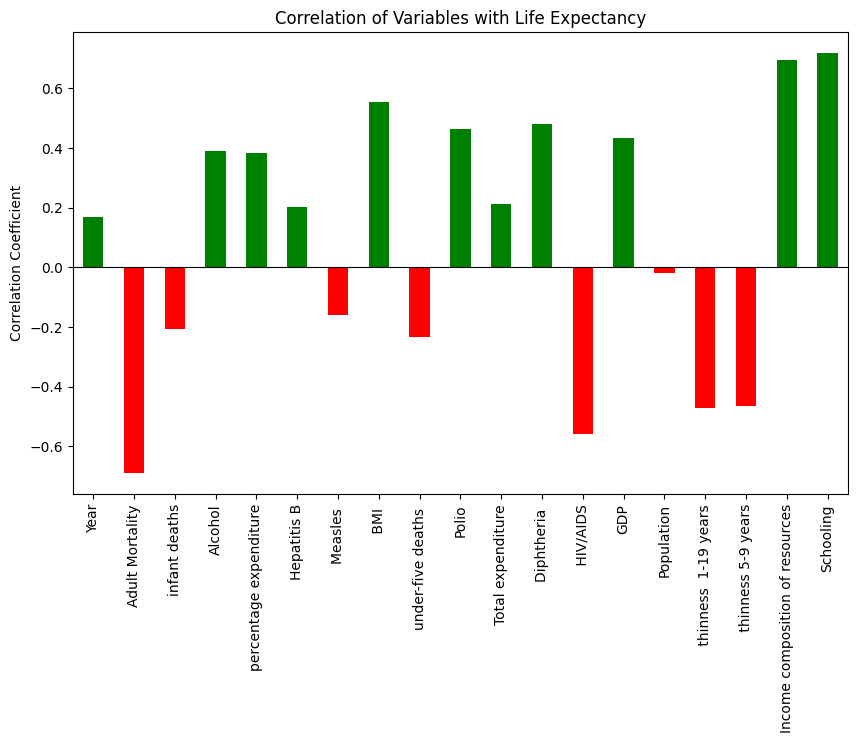

In [64]:
plt.figure(figsize=(10,6))
corr.plot(kind="bar", color=["red" if x < 0 else "green" for x in corr])
plt.axhline(0, color="black", linewidth=0.8)
plt.title("Correlation of Variables with Life Expectancy")
plt.ylabel("Correlation Coefficient")
plt.show()

In [16]:
df.describe()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,2497.000000,2488.000000,2488.000000,2497.000000,2333.000000,2497.000000,2016.000000,2497.000000,2466.000000,2497.000000,2481.000000,2306.000000,2481.000000,2497.000000,2132.000000,1.957000e+03,2466.000000,2466.000000,2356.000000,2360.000000
mean,2007.479375,69.143770,164.647508,28.987185,4.577008,731.548870,81.008433,2431.130156,38.092863,40.258710,82.419589,5.936544,82.240226,1.699199,7348.579392,1.313189e+07,4.818613,4.863058,0.625069,11.959534
std,4.616338,9.517112,124.080010,107.624711,4.056307,1987.075471,25.107816,11740.711517,20.098019,147.252113,23.703581,2.493682,23.914151,4.898429,14143.733665,6.507472e+07,4.375821,4.484728,0.213123,3.380734
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.400000,0.000000,3.000000,0.370000,2.000000,0.100000,3.685949,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2003.000000,63.200000,74.000000,0.000000,0.850000,5.347718,77.000000,0.000000,19.100000,0.000000,78.000000,4.252500,78.000000,0.100000,458.064238,1.822860e+05,1.600000,1.525000,0.489750,10.100000
50%,2007.000000,72.000000,144.000000,3.000000,3.670000,64.398533,92.000000,17.000000,43.000000,4.000000,93.000000,5.750000,93.000000,0.100000,1683.750332,1.354493e+06,3.300000,3.300000,0.676500,12.300000
75%,2011.000000,75.525000,227.000000,22.000000,7.680000,437.105966,96.000000,383.000000,56.100000,28.000000,97.000000,7.530000,97.000000,0.800000,5858.119655,7.472819e+06,7.200000,7.200000,0.780000,14.200000
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.600000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


In [ ]:
#understainding the null values in each column

df.isnull().sum()  

Country                              0
Year                                 0
Status                               0
Life expectancy                      9
Adult Mortality                      9
infant deaths                        0
Alcohol                            164
percentage expenditure               0
Hepatitis B                        481
Measles                              0
 BMI                                31
under-five deaths                    0
Polio                               16
Total expenditure                  191
Diphtheria                          16
 HIV/AIDS                            0
GDP                                365
Population                         540
 thinness  1-19 years               31
 thinness 5-9 years                 31
Income composition of resources    141
Schooling                          137
dtype: int64

In [22]:
#substituting null values with mean of the column
numeric_cols = df.select_dtypes(include=['number']).columns
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].mean())
df.isnull().sum()


Country                            0
Year                               0
Status                             0
Life expectancy                    0
Adult Mortality                    0
infant deaths                      0
Alcohol                            0
percentage expenditure             0
Hepatitis B                        0
Measles                            0
 BMI                               0
under-five deaths                  0
Polio                              0
Total expenditure                  0
Diphtheria                         0
 HIV/AIDS                          0
GDP                                0
Population                         0
 thinness  1-19 years              0
 thinness 5-9 years                0
Income composition of resources    0
Schooling                          0
dtype: int64

In [23]:
df.nunique()

Country                             192
Year                                 16
Status                                2
Life expectancy                     359
Adult Mortality                     412
infant deaths                       195
Alcohol                            1004
percentage expenditure             1995
Hepatitis B                          86
Measles                             849
 BMI                                590
under-five deaths                   234
Polio                                74
Total expenditure                   783
Diphtheria                           82
 HIV/AIDS                           181
GDP                                2133
Population                         1951
 thinness  1-19 years               191
 thinness 5-9 years                 201
Income composition of resources     618
Schooling                           173
dtype: int64

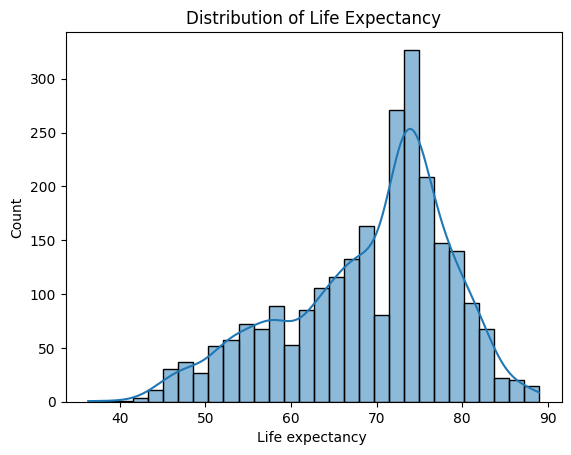

In [ ]:
#understanding the distribution of life expectancy to set a bench

sns.histplot(df["Life expectancy "], kde=True, bins=30)
plt.title("Distribution of Life Expectancy")
plt.show()

In [30]:
df[numeric_cols]

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,2009,74.2,162.0,0,11.46,1281.155944,81.008433,1,61.1,1,99.0,7.55,99.0,0.1,12967.165430,1.226500e+04,1.8,1.8,0.816,15.3
1,2010,82.0,61.0,0,1.84,4540.543752,96.000000,50,31.8,0,96.0,3.96,96.0,0.1,46569.679510,1.313189e+07,2.1,2.1,0.889,14.5
2,2008,81.0,75.0,0,9.49,6761.288966,9.000000,0,63.8,0,89.0,1.70,89.0,0.1,31287.778650,1.313189e+07,0.3,0.3,0.894,19.5
3,2000,71.0,174.0,6,2.61,28.808311,93.000000,0,38.8,8,88.0,6.63,94.0,1.7,188.783165,6.524283e+06,2.8,2.7,0.551,9.8
4,2002,68.7,177.0,61,0.15,0.000000,97.000000,653,51.8,75,97.0,5.97,97.0,0.1,7348.579392,1.313189e+07,3.4,3.4,0.617,11.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2492,2012,83.0,78.0,0,10.08,664.473898,98.000000,109,62.6,1,99.0,1.54,99.0,0.1,4474.571700,1.112825e+07,0.9,0.9,0.886,16.2
2493,2014,77.2,89.0,0,4.03,732.866249,89.000000,3000,55.3,0,86.0,9.57,86.0,0.1,5193.949320,3.566200e+04,2.4,2.4,0.742,14.2
2494,2001,52.5,32.0,5,2.55,0.868708,81.008433,126,17.9,9,56.0,5.40,53.0,3.6,39.486749,1.267512e+06,1.0,1.0,0.000,6.7
2495,2014,82.2,79.0,3,11.50,6739.677606,83.000000,267,62.0,3,98.0,11.54,98.0,0.1,42955.242870,6.633196e+07,0.6,0.6,0.890,16.2


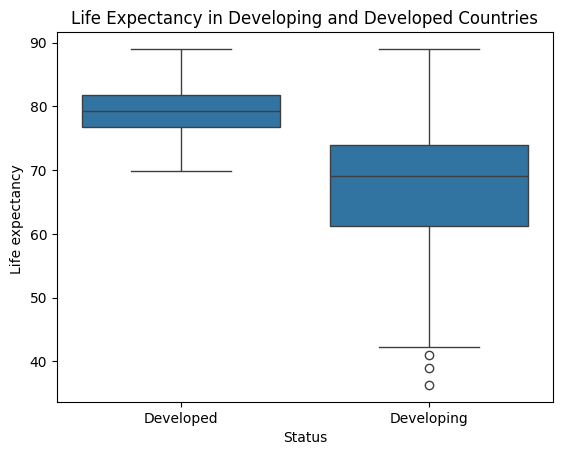

In [ ]:

sns.boxplot(x=df["Status"], y=df["Life expectancy "],
             data=df)
plt.title("Life Expectancy in Developing and Developed Countries")
plt.show()
# The range of life expectancy is higer for developing countries as compared to developed countries suggesting different access to facilites. Hence we will use O-1 encoding to include this information in our model. 

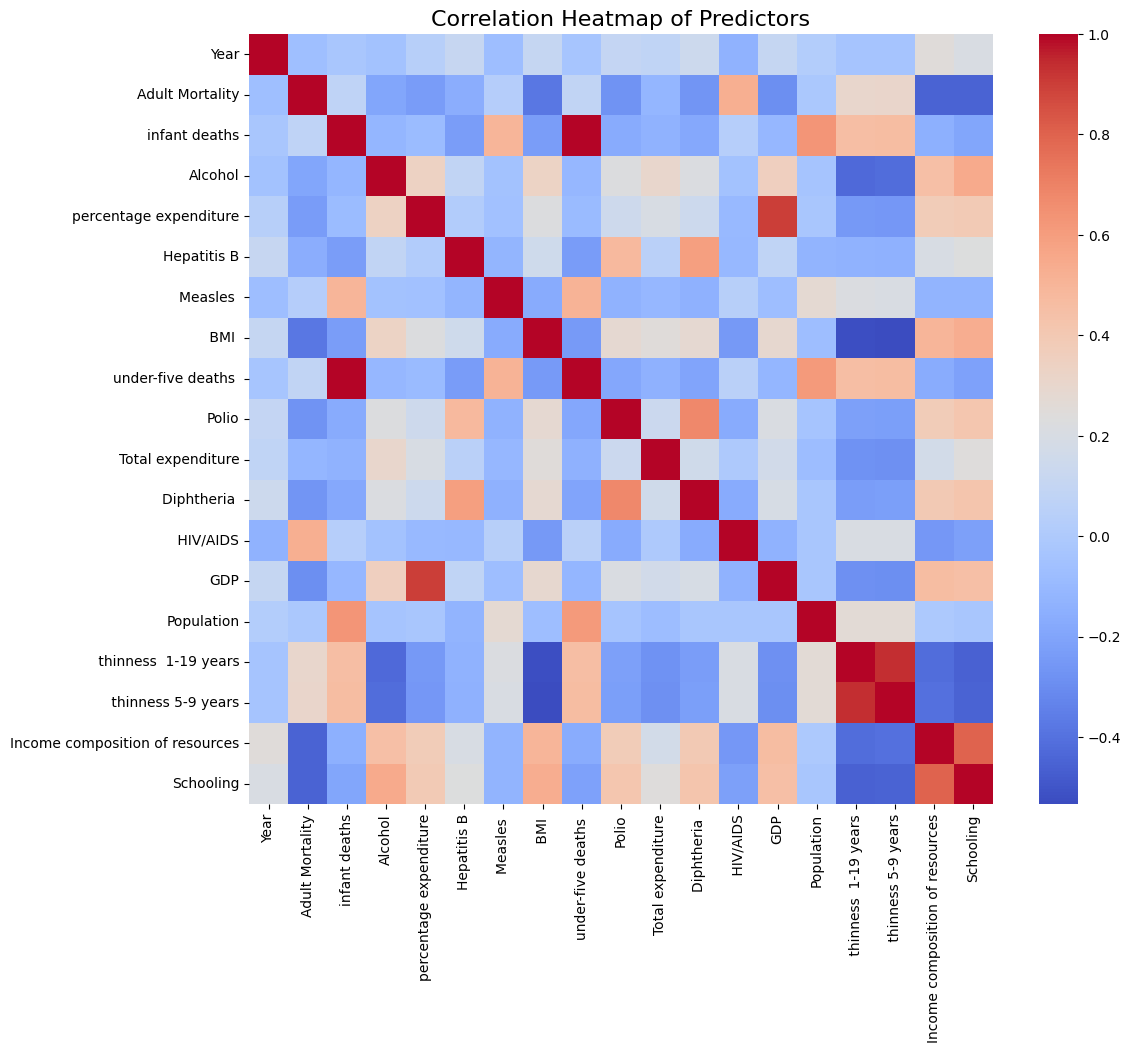

In [8]:
#to check similarity between different variables to drop similar ones 
predictors = df.drop(columns=["Life expectancy ", "Country", "Status"])

# Compute correlation
corr_matrix = predictors.corr()

# Plot heatmap
plt.figure(figsize=(12,10))
sns.heatmap(corr_matrix, annot=False, cmap="coolwarm", cbar=True)
plt.title("Correlation Heatmap of Predictors", fontsize=16)
plt.show()
